## 1. Importing the required libraries

In [1]:
import os 
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2022-02-25 12:44:06.985794: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-25 12:44:06.985877: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## 2. Loading the dataset

In [2]:
%cd ./sequences
no_of_seq = %ls -d *sequence* | wc -l #total no. of sequences
%cd ../
no_of_seq

/mnt/c/Users/dell/Desktop/CH5650/Assignment/sequences
3030
/mnt/c/Users/dell/Desktop/CH5650/Assignment


In [3]:
import glob
arr_seq = []
directory = '/mnt/c/Users/dell/Desktop/CH5650/Assignment/sequences'
 
for path in glob.iglob(f'{directory}/sequence*.txt'):
    arr_seq.append(np.loadtxt(path, dtype=float))

arr_seq = np.asarray(arr_seq)

In [4]:
arr_seq.shape

(3030, 101)

In [5]:
#Randomly selecting 500 sequences and reversing them
rows_id = random.sample(range(0, arr_seq.shape[0]-1), 500)
random_seq = arr_seq[rows_id, :]
random_seq[:,:-1] = np.flip(random_seq[:,:-1], axis=1)

In [6]:
arr_seq = np.concatenate((arr_seq,random_seq), axis=0)

In [7]:
#standardizing the sequences
scaler = StandardScaler()
arr_seq[:,:-1] = scaler.fit_transform(arr_seq[:,:-1])

In [8]:
arr_seq_x = arr_seq[:,:-1]
arr_seq_y = arr_seq[:,-1]

## 3. Splitting dataset into train and test datasets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(arr_seq_x, arr_seq_y, test_size=0.33, random_state=42)

## 4. Defining the model

In [10]:
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='linear'))

2022-02-25 12:44:17.737090: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-25 12:44:17.737200: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-25 12:44:17.737276: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-S5Q0RUJ): /proc/driver/nvidia/version does not exist
2022-02-25 12:44:17.737888: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               25856     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 500)               128500    
                                                                 
 dropout_1 (Dropout)         (None, 500)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 501       
                                                                 
Total params: 154,857
Trainable params: 154,857
Non-trainable params: 0
_________________________________________________________________


## 5. Compiling the model

In [12]:
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error'])

## 6. Defining a callback function

In [13]:
class MyCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epochs, logs={}):
        if (logs.get('loss')<0.05):
            print("\n accuracy reached")
            self.model.stop_training = True
callbacks = MyCallbacks()

## 7. Training the model

In [14]:
history = model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=1, validation_split=0.2, callbacks=[callbacks])

Epoch 1/500
60/60 [==============================] - 1s 6ms/step - loss: 0.5674 - mean_squared_error: 0.7840 - mean_absolute_error: 0.5674 - val_loss: 0.2589 - val_mean_squared_error: 0.1279 - val_mean_absolute_error: 0.2589
Epoch 2/500
60/60 [==============================] - 0s 4ms/step - loss: 0.3132 - mean_squared_error: 0.1890 - mean_absolute_error: 0.3132 - val_loss: 0.3320 - val_mean_squared_error: 0.1870 - val_mean_absolute_error: 0.3320
Epoch 3/500
60/60 [==============================] - 0s 4ms/step - loss: 0.3240 - mean_squared_error: 0.1961 - mean_absolute_error: 0.3240 - val_loss: 0.2556 - val_mean_squared_error: 0.1111 - val_mean_absolute_error: 0.2556
Epoch 4/500
60/60 [==============================] - 0s 5ms/step - loss: 0.2833 - mean_squared_error: 0.1543 - mean_absolute_error: 0.2833 - val_loss: 0.2889 - val_mean_squared_error: 0.1462 - val_mean_absolute_error: 0.2889
Epoch 5/500
60/60 [==============================] - 0s 4ms/step - loss: 0.2915 - mean_squared_error

## 8. Making predictions

In [15]:
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

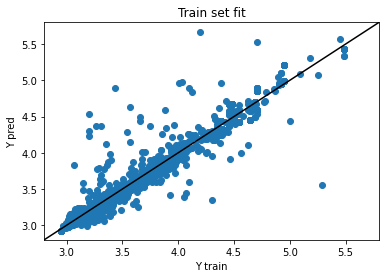

In [23]:
plt.scatter(y_train, Y_train_pred)
plt.plot(np.linspace(2.8,5.8), np.linspace(2.8,5.8), 'k-')
plt.margins(0)
plt.xlabel('Y train')
plt.ylabel('Y pred')
plt.title('Train set fit')
plt.savefig("trainfit.svg")
plt.show()

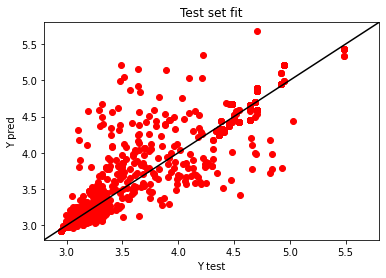

In [24]:
plt.scatter(y_test, Y_test_pred, c='red')
plt.plot(np.linspace(2.8,5.8), np.linspace(2.8,5.8), 'k-')
plt.margins(0)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.title('Test set fit')
plt.savefig("testfit.svg")
plt.show()

## 9. Evaluating the model

### Plotting the error history

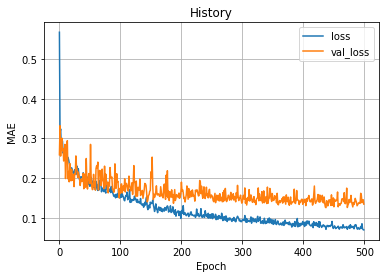

In [25]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.legend()
    plt.title('History')
    plt.grid(True)
    plt.savefig("lossplot.svg")
plot_loss(history)

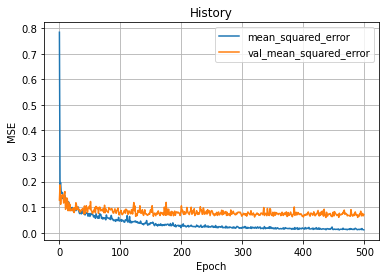

In [26]:
def plot_mse(history):
    plt.plot(history.history['mean_squared_error'], label='mean_squared_error')
    plt.plot(history.history['val_mean_squared_error'], label='val_mean_squared_error')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.title('History')
    plt.grid(True)
    plt.savefig("mseplot.svg")
plot_mse(history)

### R2 Score

In [20]:
print('R2 score train : %.3f, R2 score test : %.3f' % (r2_score(y_train, Y_train_pred), r2_score(y_test, Y_test_pred)))

R2 score train : 0.953, R2 score test : 0.820


### Mean Squared Error

In [21]:
print('\n Train Set:')
print('MSE = %.3f' % mean_squared_error(y_train, Y_train_pred))
print('RMSE = %.3f' % mean_squared_error(y_train, Y_train_pred, squared=False))
print('MAE = %.3f' % mean_absolute_error(y_train, Y_train_pred))


 Train Set:
MSE = 0.018
RMSE = 0.134
MAE = 0.062


In [22]:
print('\n Test Set:')
print('MSE = %.3f' % mean_squared_error(y_test, Y_test_pred))
print('RMSE = %.3f' % mean_squared_error(y_test, Y_test_pred, squared=False))
print('MAE = %.3f' % mean_absolute_error(y_test, Y_test_pred))


 Test Set:
MSE = 0.072
RMSE = 0.269
MAE = 0.141
